# EDA of Heart disease dataset

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [12]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Note: No missing values in all of the variables

In [13]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2




- **Age**:    age
- **Sex:**    sex
- **cp:**    chest pain type (4 values)
- **trestbps:**    resting blood pressure
- **chol:**    serum cholestoral in mg/dl
- **fbs:**    fasting blood sugar > 120 mg/dl
- **restecg:**    resting electrocardiographic results (values 0,1,2)
- **thalach:**    maximum heart rate achieved
- **exang:**    exercise induced angina
- **oldpeak:**    oldpeak = ST depression induced by exercise relative to rest
- **slope:**    the slope of the peak exercise ST segment
- **ca:**    number of major vessels (0-3) colored by flourosopy
- **thal:**    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



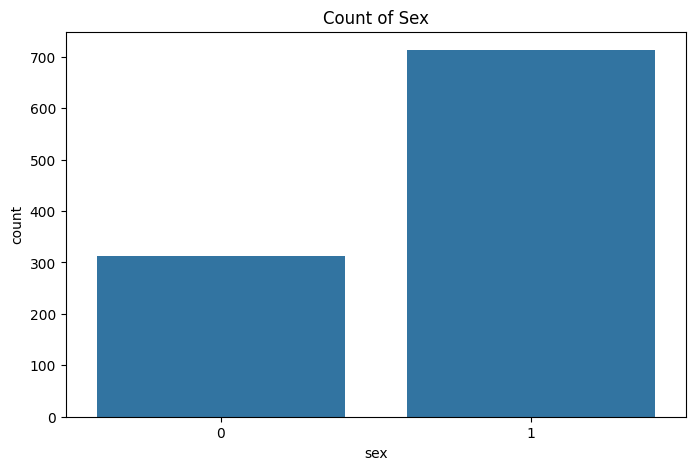

In [14]:
# make barplot of sex counts
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sex')
plt.title('Count of Sex')
plt.show()

Note: It seems the dataset is skewed towards one gender

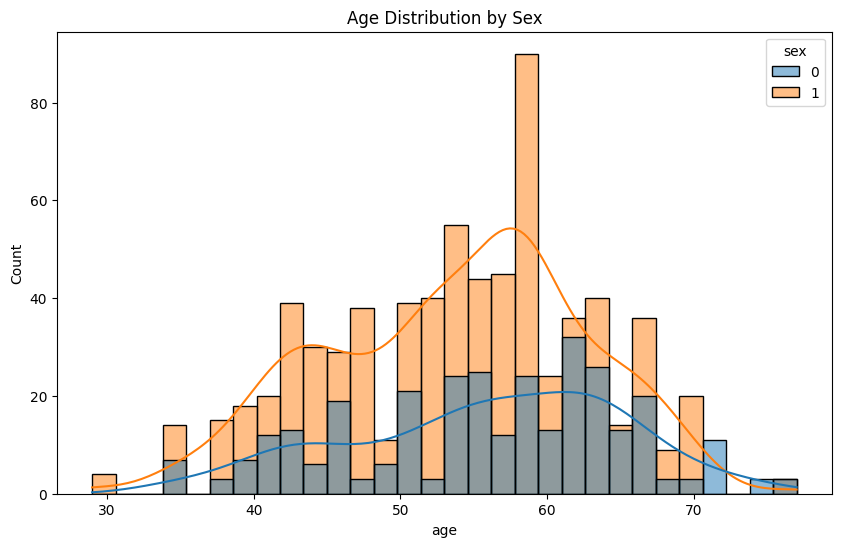

In [15]:
# make a distribution plot of age grouped by sex
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='sex', kde=True, bins=30)
plt.title('Age Distribution by Sex')
plt.show()

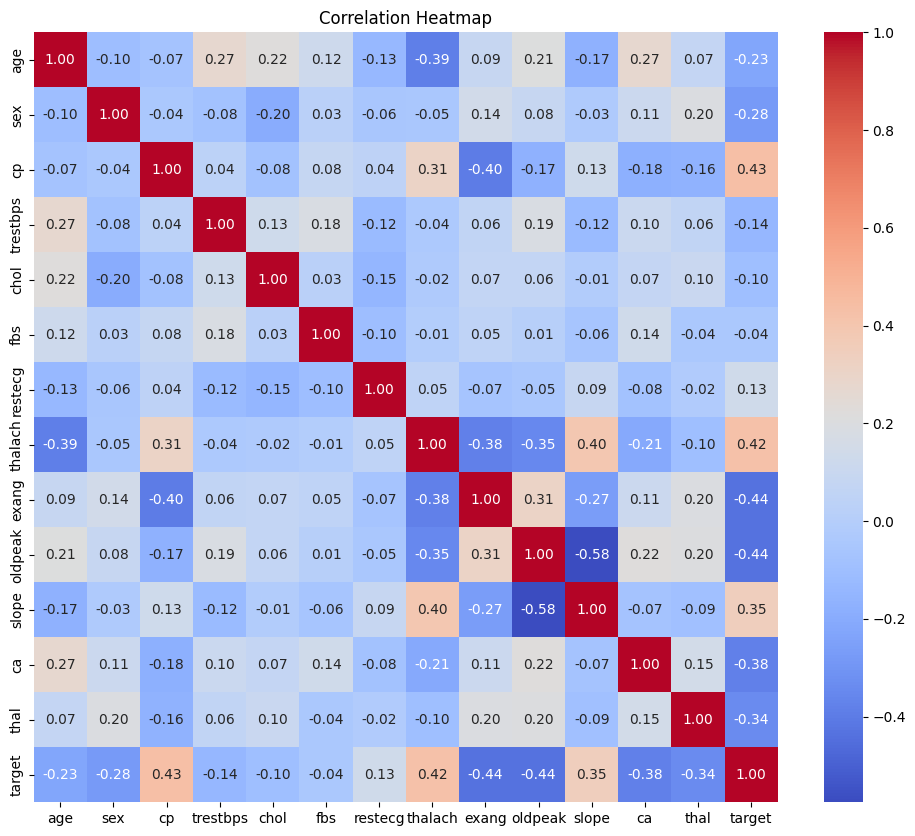

In [16]:
# make correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Note: Not a lot of initial very strong positive or negative correlations found, but there are some

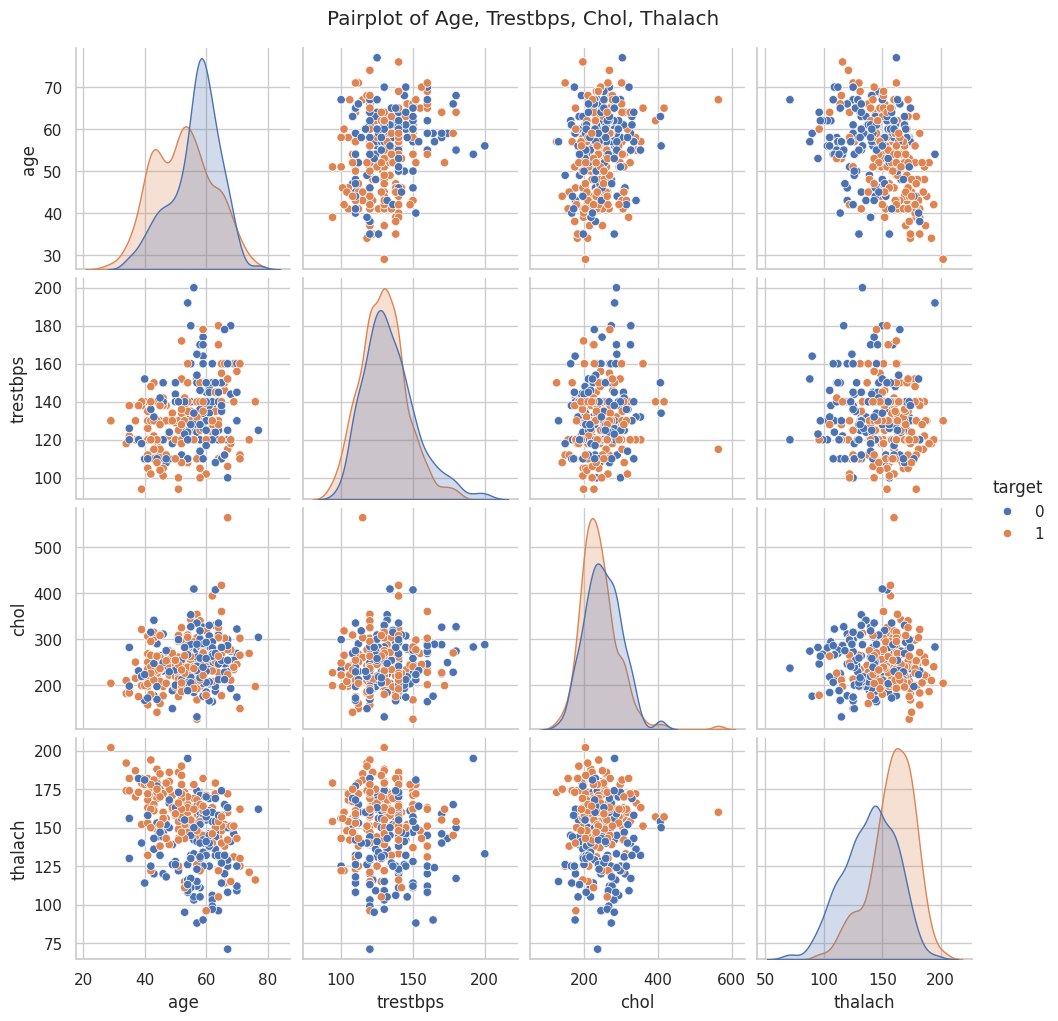

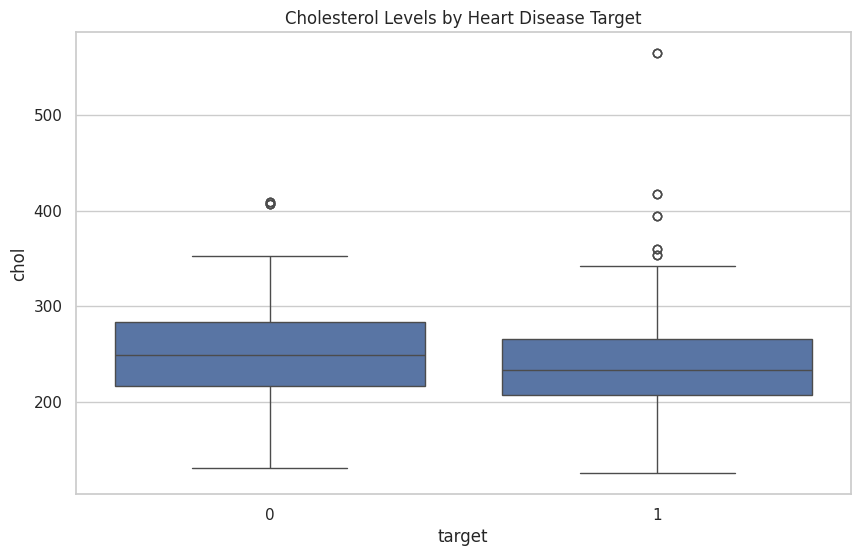

In [18]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach'], hue='target')
plt.suptitle('Pairplot of Age, Trestbps, Chol, Thalach', y=1.02)
plt.show()  
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Target')
plt.show()